<a href="https://colab.research.google.com/github/er-prateek-tripathi/Social_Media_Analysis/blob/master/Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media Analysis and Visualization

## Importing Related Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [3]:
df = pd.read_csv('Twitter_Analysis.csv')
df

,Date,Category,Likes,Shares,Reposts,Comments
0,2015-01-01,Fashion,7495,379,186,9386
1,2015-01-01,Health,1434,741,53,9397
2,2015-01-01,Family,6412,686,55,9525
3,2015-01-01,Culture,3894,914,127,9728
4,2015-01-01,Travel,9825,614,29,4575
...,...,...,...,...,...,...
89995,2023-12-30,Food,4435,553,165,8142
89996,2023-12-30,Fitness,9157,846,84,7711
89997,2023-12-30,Music,8197,714,97,5392
89998,2023-12-30,Fashion,6662,119,165,3477


In [4]:
df.describe()

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,4988.509044,500.666144,99.790622,5008.241367
std,2886.904448,288.712012,57.751705,2887.542860
min,0.000000,0.000000,0.000000,0.000000
25%,2467.000000,250.000000,50.000000,2509.000000
50%,4996.000000,502.000000,100.000000,5018.500000
75%,7485.000000,750.000000,150.000000,7509.000000
max,9999.000000,999.000000,199.000000,9999.000000


## In Depth Analysis

In [6]:
df.head

<bound method NDFrame.head of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01  Fashion   7495     379      186      9386
1      2015-01-01   Health   1434     741       53      9397
2      2015-01-01   Family   6412     686       55      9525
3      2015-01-01  Culture   3894     914      127      9728
4      2015-01-01   Travel   9825     614       29      4575
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30     Food   4435     553      165      8142
89996  2023-12-30  Fitness   9157     846       84      7711
89997  2023-12-30    Music   8197     714       97      5392
89998  2023-12-30  Fashion   6662     119      165      3477
89999  2023-12-31   Travel   8747     154       74      9426

[90000 rows x 6 columns]>

In [7]:
df.tail

<bound method NDFrame.tail of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01  Fashion   7495     379      186      9386
1      2015-01-01   Health   1434     741       53      9397
2      2015-01-01   Family   6412     686       55      9525
3      2015-01-01  Culture   3894     914      127      9728
4      2015-01-01   Travel   9825     614       29      4575
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30     Food   4435     553      165      8142
89996  2023-12-30  Fitness   9157     846       84      7711
89997  2023-12-30    Music   8197     714       97      5392
89998  2023-12-30  Fashion   6662     119      165      3477
89999  2023-12-31   Travel   8747     154       74      9426

[90000 rows x 6 columns]>

In [32]:
df.dtypes

Date        object
Category    object
Likes        int64
Shares       int64
Reposts      int64
Comments     int64
dtype: object

In [40]:
df.corr()

,Likes,Shares,Reposts,Comments
Likes,1.000000,-0.001874,-0.005995,-0.000187
Shares,-0.001874,1.000000,0.000171,-0.006051
Reposts,-0.005995,0.000171,1.000000,-0.003912
Comments,-0.000187,-0.006051,-0.003912,1.000000


In [12]:
numeric_features = df.select_dtypes(include=[np.int64])

numeric_features.columns

Index(['Likes', 'Shares', 'Reposts', 'Comments'], dtype='object')

In [10]:
categorical_features = df.select_dtypes(include=[object])

categorical_features.columns

Index(['Date', 'Category'], dtype='object')

In [13]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of              Date Category  Likes  Shares  Reposts  Comments
0      2015-01-01  Fashion   7495     379      186      9386
1      2015-01-01   Health   1434     741       53      9397
2      2015-01-01   Family   6412     686       55      9525
3      2015-01-01  Culture   3894     914      127      9728
4      2015-01-01   Travel   9825     614       29      4575
...           ...      ...    ...     ...      ...       ...
89995  2023-12-30     Food   4435     553      165      8142
89996  2023-12-30  Fitness   9157     846       84      7711
89997  2023-12-30    Music   8197     714       97      5392
89998  2023-12-30  Fashion   6662     119      165      3477
89999  2023-12-31   Travel   8747     154       74      9426

[90000 rows x 6 columns]>

In [46]:
df.describe(include=['object'])

,Date,Category
count,90000,90000
unique,3287,8
top,2015-01-01,Food
freq,28,11360


In [47]:
df.describe(include=['int64'])

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,4988.509044,500.666144,99.790622,5008.241367
std,2886.904448,288.712012,57.751705,2887.542860
min,0.000000,0.000000,0.000000,0.000000
25%,2467.000000,250.000000,50.000000,2509.000000
50%,4996.000000,502.000000,100.000000,5018.500000
75%,7485.000000,750.000000,150.000000,7509.000000
max,9999.000000,999.000000,199.000000,9999.000000


## Exploratory Data Analysis

In [48]:
df['Category'].value_counts()

Food       11360
Culture    11329
Music      11287
Fitness    11258
Health     11247
Fashion    11237
Family     11186
Travel     11096
Name: Category, dtype: int64

In [49]:
df_group = df[['Category','Likes','Reposts']]

In [50]:
df_group = df_group.groupby(['Category'],as_index=False).mean()
df_group

,Category,Likes,Reposts
0,Culture,4981.837055,99.366140
1,Family,4992.789648,99.588235
2,Fashion,5013.476907,99.657560
3,Fitness,4981.561379,99.605525
4,Food,4977.206954,98.776320
5,Health,5018.536410,100.090424
6,Music,4979.910960,101.226012
7,Travel,4962.650865,100.025054


In [51]:
# grouping results
df_gptest = df[['Category','Likes','Reposts']]
grouped_test1 = df_gptest.groupby(['Category','Reposts'],as_index=False).mean()
grouped_test1

,Category,Reposts,Likes
0,Culture,0,5023.735849
1,Culture,1,5129.054545
2,Culture,2,5005.032787
3,Culture,3,5111.735849
4,Culture,4,4769.700000
...,...,...,...
1595,Travel,195,5015.836735
1596,Travel,196,5386.581818
1597,Travel,197,5111.531915
1598,Travel,198,4435.719298


### Pearson Correlation helps in defining Linear Correlation between two variables.

In [60]:
from scipy import stats
#Let's calculate the Pearson Correlation Coefficient and P-value of different variables.

cols = ['Likes', 'Shares', 'Reposts', 'Comments']

for col in cols:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Likes'])
    print("The PearsonR between {} and Likes is {} with a P-value of P = {}".format(
          col, round(pearson_coef,4), round(p_value,4) ))

    if p_value < 0.001:
        print('Correlation between {} and Likes is statistically significant..'.format(col))
    elif p_value < 0.05:
        print('Correlation between {} and Likes is statistically moderate..'.format(col))
    elif p_value < 0.1:
        print('Correlation between {} and Likes is statistically weak..'.format(col))
    else:
        print('Correlation between {} and Likes is statistically not significant..'.format(col))

    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print('Coeff ~{} shows that the relationship is positive and very strong.\n'.format(round(pearson_coef,4)))
        elif pearson_coef > 0.75 :
            print('Coeff ~{} shows that the relationship is positive and quite strong.\n'.format(round(pearson_coef,4)))
        elif pearson_coef > 0.60:
            print('Coeff ~{} shows that the relationship is positive and moderately strong.\n'.format(round(pearson_coef,4)))
        elif pearson_coef > 0.50 :
            print('Coeff ~{} shows that the relationship is positive and only moderate.\n'.format(round(pearson_coef,4)))
        else:
            print('Coefficient ~{} shows that the relationship is positive and weak.\n'.format(round(pearson_coef,4)))
    else:
        if abs(pearson_coef) > 0.85:
            print('Coeff ~{} shows that the relationship is negative and very strong.\n'.format(round(pearson_coef,4)))
        elif abs(pearson_coef) > 0.75 :
            print('Coeff ~{} shows that the relationship is negative and quite strong.\n'.format(round(pearson_coef,4)))
        elif abs(pearson_coef) > 0.60:
            print('Coeff ~{} shows that the relationship is negative and moderately strong.\n'.format(round(pearson_coef,4)))
        elif abs(pearson_coef) > 0.50 :
            print('Coeff ~{} shows that the relationship is negative and only moderate.\n'.format(round(pearson_coef,4)))
        else:
            print('Coefficient ~{} shows that the relationship is negative and weak.\n'.format(round(pearson_coef,4)))


The PearsonR between Likes and Likes is 1.0 with a P-value of P = 0.0
Correlation between Likes and Likes is statistically significant..
Coeff ~1.0 shows that the relationship is positive and very strong.

The PearsonR between Shares and Likes is -0.0019 with a P-value of P = 0.574
Correlation between Shares and Likes is statistically not significant..
Coefficient ~-0.0019 shows that the relationship is negative and weak.

The PearsonR between Reposts and Likes is -0.006 with a P-value of P = 0.0721
Correlation between Reposts and Likes is statistically weak..
Coefficient ~-0.006 shows that the relationship is negative and weak.

The PearsonR between Comments and Likes is -0.0002 with a P-value of P = 0.9552
Correlation between Comments and Likes is statistically not significant..
Coefficient ~-0.0002 shows that the relationship is negative and weak.



## Graphical Analysis

<Axes: xlabel='Skewness', ylabel='Density'>

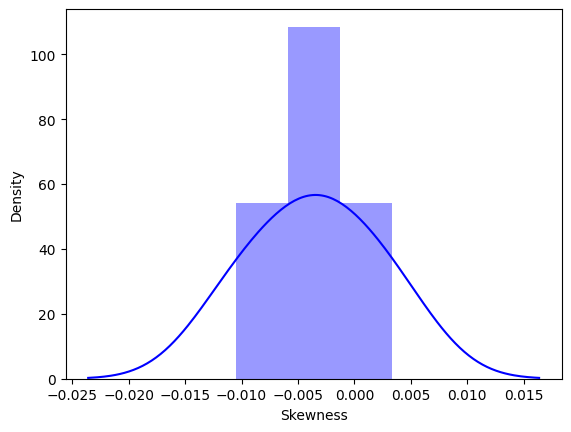

In [31]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

### A distplot infers the distribution of a variable.

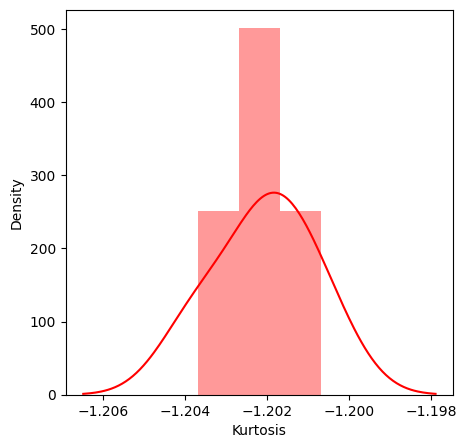

In [30]:
plt.figure(figsize = (5,5))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

### A heatmap shows the variation of a continuous value across two dimensions.

Index(['Likes', 'Comments', 'Shares', 'Reposts'], dtype='object')


<Axes: >

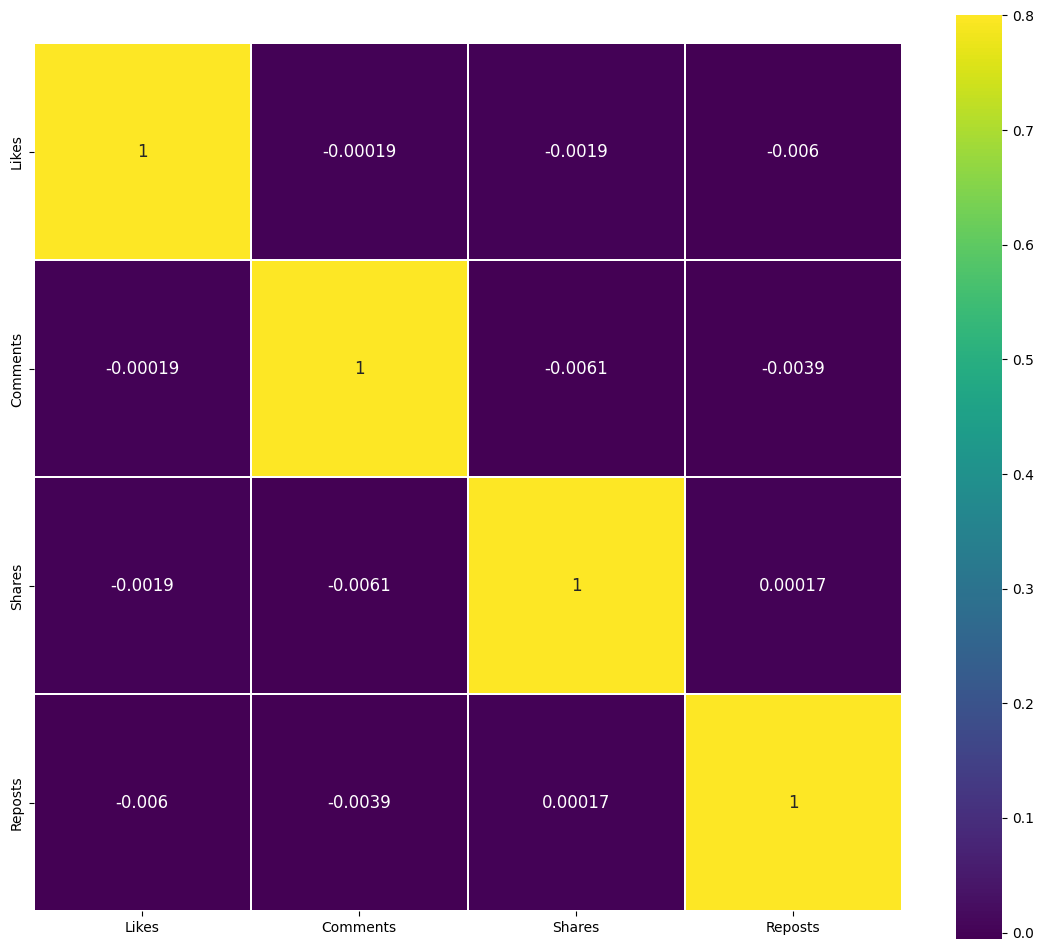

In [24]:
k= 11
correlation = numeric_features.corr()
cols = correlation.nlargest(k,'Likes')['Likes'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)